/home/hera/nodoka/.pyenv/versions/anaconda3-5.3.0/lib/python3.5/site-packages/matplotlib/pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/hera/nodoka/.pyenv/versions/anaconda3-5.3.0/lib/python3.5/site-packages/ipykernel_launcher.py:95: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


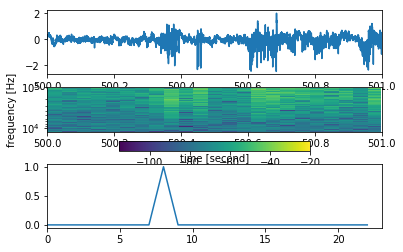

In [2]:
import pickle
import numpy as np
import pandas as pd
import wave
#import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
    
####base---------------------------------------------------------------------------------------------
starttime = 500
endtime = 501
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(6,4))

plt.subplot(3, 1, 1)
#fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)


plt.xlim(starttime,endtime)
plt.plot(datatime,df[start:end])
del datatime

#data = df.dataframe([0], dtype='float')
#data = (pd.Series(df[start:end], dtype=np.float64))
#data = df.as_matrix(0,)#[start:end]
specdatab = np.array(df[start:end])
del df
specdataa = specdatab.flatten()
del specdatab
fp.close
#print(specdataa)
N = 2048
hammingWindow = np.hamming(N)
samplingrate = 25000
length = (end - start)/samplingrate

# FFTで用いるハミング窓
hammingWindow = np.hamming(N)


# スペクトログラムを描画
plt.subplot(3, 1, 2)



pxx, freqs, bins, im = plt.specgram(specdataa, NFFT=N, Fs=samplingrate, noverlap=N/2, window=hammingWindow,  xextent=(starttime,endtime))
axis([starttime, starttime + length, 0, samplingrate / 2])
plt.yscale("log")
xlabel("time [second]")
#print(pxx)

#print(freqs)
#print(bins)
#print(im)
#plt.xlim(starttime,starttime+length)
#print(type(bins))
#for i in range(end-start):
#    bins[i] = (bins[i] + starttime)
plt.ylim(0,1024)
ylabel("frequency [Hz]")

plt.colorbar(orientation='horizontal')
#fig = plt.figure()
#ax = plt.subplot(311)

#image = ax.pcolormesh(freqs, im, a)
#ax.axis("image")

#fig, ax = plt.subplots()

#divider = make_axes_locatable(ax)
#ax_cb = divider.new_horizontal(size="2%", pad=0.05)
#fig.add_axes(ax_cb)
#plt.colorbar(cax=ax_cb)
plt.subplot(3,1,3)
spec = pd.DataFrame(pxx)
#print(spec)
#print(spec.ix[1024])
xlim(0,len(spec.columns))
#plt.plot((spec.ix[1000]>8.0e-08) & (spec.ix[600]>8.0e-08))
#plt.plot((spec.ix[600]>8.0e-08))
plt.plot((spec.ix[600]>3.0e-07))

plt.show()
#plt.savefig('B39tamesis_spec-ripple.png',dpi=300)

del specdataa, pxx, freqs, bins, im, spec

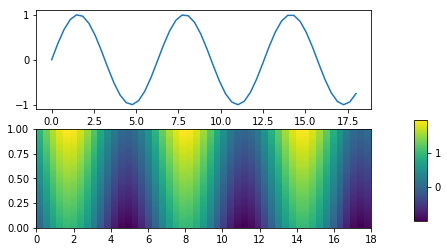

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2)

# Some demo data
x = np.linspace(0, 18)
y = np.linspace(0, 1)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + Y

# Something on axes 1
ax1.plot(x, np.sin(x))

# Plot the pcolormesh
pcm = ax2.pcolormesh(X, Y, Z)

# create color bar: the important part!
axColor = plt.axes([1.0, 0.15, 0.03, 0.35])
plt.colorbar(pcm, cax=axColor, orientation="vertical")
plt.show()